<a href="https://www.kaggle.com/code/anannoasif/wind-power-prediction?scriptVersionId=157947970" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import PowerTransformer

%matplotlib inline

In [2]:
train = pd.read_csv('/kaggle/input/wind-power-prediction-contest-202312/train.csv')
train

,機艙水冷單元 冷卻器入口水溫 (degC),齒輪箱 發電機側輸出軸軸承 溫度 (degC),齒輪箱 潤滑油 溫度 (degC),齒輪箱 油循環單元 泵液壓 (MPa),發電機 軸承反驅動側溫度 (degC),發電機旋轉速度 HSS編碼器值 (1/min),高壓盤 有效功率(風機輸出) (kW),液壓單元 系統壓力 (MPa),風速 (m/s),風向 (0-360) (deg),...,機艙 内部溫度 (degC),機艙 内部濕度 (%),PCS 受電點電壓 (V),PCS 受電點電流 (A),PCS 發電機旋轉速度 (1/min),旋翼 平均角度 (deg),低速軸旋轉速度 LSS編碼器 (min-1),機艙方位角 (0-360)(10分 瞬時値) (deg),轉向編碼器 (deg),液壓單元 轉向煞車鉗壓 (MPa)
0,24.458769,47.001832,37.945900,0.913650,40.212129,9.371261,0.000000,12.948042,7.976848,36.123240,...,27.177401,30.458638,33320.91833,1.571667,0.000000,84.409004,0.235855,36.481287,226.235962,12.899975
1,32.501084,52.678632,30.165458,0.835095,38.880129,440.787898,1992.671493,12.652125,5.522340,23.964763,...,27.412875,36.032404,33696.64017,665.559250,440.777683,-1.996038,11.089298,22.845707,210.931238,12.459758
2,24.594999,27.390723,30.213709,0.936604,37.172228,16.072581,0.000000,12.900080,13.272677,28.514370,...,23.842367,48.724996,33687.13533,1.576833,0.000000,84.453667,0.404136,29.011804,214.595032,12.948140
3,24.628666,28.586590,31.728528,0.934403,38.970898,12.855424,0.000000,12.898072,11.050120,37.685313,...,24.285414,46.206156,33732.60167,1.576567,0.000000,84.434195,0.323352,35.905555,222.102356,12.940351
4,24.605897,29.740284,32.496518,0.932735,40.431457,20.196120,0.000000,12.937997,14.672835,35.995404,...,22.531229,32.891911,33705.05867,1.571567,0.000000,84.443337,0.507790,32.702942,222.825553,12.836197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,32.637656,54.325009,38.812775,0.828794,37.604576,465.342115,5186.714658,12.933390,16.642581,29.691411,...,22.276528,39.858607,33535.26717,1691.535333,465.332593,17.469848,11.709306,31.366307,220.129394,12.925912
3121,35.710912,56.841869,42.538122,0.801598,47.173849,465.311826,5157.453935,12.929737,11.376646,31.188732,...,29.371574,35.405541,33879.37933,1667.519417,465.303129,8.083183,11.707931,29.568040,222.825623,12.939490
3122,35.965522,57.120973,43.041753,0.799066,47.690407,465.021978,5134.623594,12.928035,11.008506,33.457812,...,30.018587,34.930880,33803.32800,1664.457267,465.013351,7.245678,11.698990,32.696814,221.414094,12.937122
3123,24.603717,28.144841,31.326369,0.935924,38.629963,16.398619,0.000000,12.877559,12.884826,34.943547,...,24.067690,46.634386,33710.84500,1.579400,0.000000,84.434173,0.412270,33.645418,222.102356,12.886564


In [3]:
test = pd.read_csv('/kaggle/input/wind-power-prediction-contest-202312/test.csv')
test

,機艙水冷單元 冷卻器入口水溫 (degC),齒輪箱 發電機側輸出軸軸承 溫度 (degC),齒輪箱 潤滑油 溫度 (degC),齒輪箱 油循環單元 泵液壓 (MPa),發電機 軸承反驅動側溫度 (degC),發電機旋轉速度 HSS編碼器值 (1/min),液壓單元 系統壓力 (MPa),風速 (m/s),風向 (0-360) (deg),轉向誤差 (deg),機艙 内部溫度 (degC),機艙 内部濕度 (%),PCS 受電點電壓 (V),PCS 受電點電流 (A),PCS 發電機旋轉速度 (1/min),旋翼 平均角度 (deg),低速軸旋轉速度 LSS編碼器 (min-1),機艙方位角 (0-360)(10分 瞬時値) (deg),轉向編碼器 (deg),液壓單元 轉向煞車鉗壓 (MPa)
0,35.187994,56.490996,42.128414,0.808256,46.374334,463.937143,13.127270,6.989762,30.643719,-1.956880,30.316906,29.649077,33759.36583,1070.036017,463.928124,-1.883079,11.671765,28.020434,220.976257,13.170055
1,34.760552,55.794605,41.715616,0.812604,45.623628,464.390435,13.010711,6.762789,27.759324,-2.374665,30.413870,29.573799,33732.29950,1000.625983,464.380588,-1.952187,11.683091,24.426799,217.764457,12.450916
2,34.012947,55.793109,41.163765,0.818740,44.484311,464.896812,12.962874,6.819619,21.526013,-1.388677,30.043127,29.965729,33742.11050,1013.148583,464.887596,-1.954525,11.696242,25.388711,212.110883,11.665322
3,33.665044,55.769378,40.739833,0.821732,43.357152,465.238064,12.952348,7.107348,25.096369,1.084411,29.717009,30.818397,33721.12250,1128.234567,465.229276,-1.927029,11.705234,25.761854,216.073608,12.942878
4,33.759384,55.763230,40.696229,0.821661,43.196289,465.007174,12.943970,6.915826,24.326569,-0.505909,29.838707,30.928874,33735.08350,1069.090200,464.998055,-1.950314,11.698919,25.762275,213.277189,12.542494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,23.340644,27.572870,28.458112,0.886549,34.923434,9.952544,12.942450,8.730537,23.074145,-1.817784,23.345067,44.281775,33532.92383,1.583867,0.000000,84.156006,0.250193,21.594770,214.554256,12.956039
1335,23.186917,28.474734,28.524520,0.878426,34.699441,11.264103,12.937924,9.219492,21.730249,-3.364527,23.343495,45.162480,33520.38767,1.574000,0.000000,84.156006,0.283295,24.605723,214.448547,13.043203
1336,23.152444,30.318500,28.591044,0.864673,34.410244,199.864541,12.928599,9.057105,19.250157,-1.740605,23.389818,45.406054,33544.99267,507.554517,190.833458,47.649228,5.023251,20.413514,208.186882,12.737122
1337,29.988194,37.043012,28.347614,0.867954,34.681244,464.972181,12.896465,7.895836,18.938147,-3.797813,23.505712,45.644225,33565.84750,1342.799500,464.960894,-1.863826,11.698140,19.781505,206.721009,12.441905


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3125 entries, 0 to 3124
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   機艙水冷單元 冷卻器入口水溫 (degC)         3125 non-null   float64
 1   齒輪箱 發電機側輸出軸軸承 溫度 (degC)       3125 non-null   float64
 2   齒輪箱 潤滑油 溫度 (degC)             3125 non-null   float64
 3   齒輪箱 油循環單元 泵液壓 (MPa)           3125 non-null   float64
 4   發電機 軸承反驅動側溫度 (degC)           3125 non-null   float64
 5   發電機旋轉速度 HSS編碼器值 (1/min)       3125 non-null   float64
 6   高壓盤 有效功率(風機輸出) (kW)           3125 non-null   float64
 7   液壓單元 系統壓力 (MPa)               3125 non-null   float64
 8   風速 (m/s)                      3125 non-null   float64
 9   風向 (0-360) (deg)              3125 non-null   float64
 10  轉向誤差 (deg)                    3125 non-null   float64
 11  機艙 内部溫度 (degC)                3125 non-null   float64
 12  機艙 内部濕度 (%)                   3125 non-null   float64
 13  PCS

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   機艙水冷單元 冷卻器入口水溫 (degC)         1339 non-null   float64
 1   齒輪箱 發電機側輸出軸軸承 溫度 (degC)       1339 non-null   float64
 2   齒輪箱 潤滑油 溫度 (degC)             1339 non-null   float64
 3   齒輪箱 油循環單元 泵液壓 (MPa)           1339 non-null   float64
 4   發電機 軸承反驅動側溫度 (degC)           1339 non-null   float64
 5   發電機旋轉速度 HSS編碼器值 (1/min)       1339 non-null   float64
 6   液壓單元 系統壓力 (MPa)               1339 non-null   float64
 7   風速 (m/s)                      1339 non-null   float64
 8   風向 (0-360) (deg)              1339 non-null   float64
 9   轉向誤差 (deg)                    1339 non-null   float64
 10  機艙 内部溫度 (degC)                1339 non-null   float64
 11  機艙 内部濕度 (%)                   1339 non-null   float64
 12  PCS 受電點電壓 (V)                 1339 non-null   float64
 13  PCS

In [6]:
train.isna().sum()

機艙水冷單元 冷卻器入口水溫 (degC)           0
齒輪箱 發電機側輸出軸軸承 溫度 (degC)         0
齒輪箱 潤滑油 溫度 (degC)               0
齒輪箱 油循環單元 泵液壓 (MPa)             0
發電機 軸承反驅動側溫度 (degC)             0
發電機旋轉速度 HSS編碼器值 (1/min)         0
高壓盤 有效功率(風機輸出) (kW)             0
液壓單元 系統壓力 (MPa)                 0
風速 (m/s)                        0
風向 (0-360) (deg)                0
轉向誤差 (deg)                      0
機艙 内部溫度 (degC)                  0
機艙 内部濕度 (%)                     0
PCS 受電點電壓 (V)                   0
PCS 受電點電流 (A)                   0
PCS 發電機旋轉速度 (1/min)             0
旋翼 平均角度 (deg)                   0
低速軸旋轉速度 LSS編碼器 (min-1)          0
機艙方位角 (0-360)(10分 瞬時値) (deg)    0
轉向編碼器 (deg)                     0
液壓單元 轉向煞車鉗壓 (MPa)               0
dtype: int64

In [7]:
test.isna().sum()

機艙水冷單元 冷卻器入口水溫 (degC)           0
齒輪箱 發電機側輸出軸軸承 溫度 (degC)         0
齒輪箱 潤滑油 溫度 (degC)               0
齒輪箱 油循環單元 泵液壓 (MPa)             0
發電機 軸承反驅動側溫度 (degC)             0
發電機旋轉速度 HSS編碼器值 (1/min)         0
液壓單元 系統壓力 (MPa)                 0
風速 (m/s)                        0
風向 (0-360) (deg)                0
轉向誤差 (deg)                      0
機艙 内部溫度 (degC)                  0
機艙 内部濕度 (%)                     0
PCS 受電點電壓 (V)                   0
PCS 受電點電流 (A)                   0
PCS 發電機旋轉速度 (1/min)             0
旋翼 平均角度 (deg)                   0
低速軸旋轉速度 LSS編碼器 (min-1)          0
機艙方位角 (0-360)(10分 瞬時値) (deg)    0
轉向編碼器 (deg)                     0
液壓單元 轉向煞車鉗壓 (MPa)               0
dtype: int64

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
機艙水冷單元 冷卻器入口水溫 (degC),3125.0,32.370363,4.390382,18.759177,30.805927,34.247254,35.485206,38.861454
齒輪箱 發電機側輸出軸軸承 溫度 (degC),3125.0,50.254584,9.319244,26.505810,46.464049,55.412189,56.724316,57.760793
齒輪箱 潤滑油 溫度 (degC),3125.0,38.298961,5.090729,26.383263,33.145486,40.834251,42.297337,44.188458
齒輪箱 油循環單元 泵液壓 (MPa),3125.0,0.830328,0.060581,0.012528,0.803747,0.814703,0.840763,0.939600
發電機 軸承反驅動側溫度 (degC),3125.0,43.180873,3.845384,31.341821,40.403795,43.804157,46.725412,48.718496
發電機旋轉速度 HSS編碼器值 (1/min),3125.0,352.953425,184.041132,-11.833966,322.047395,464.734757,465.202529,465.455771
高壓盤 有效功率(風機輸出) (kW),3125.0,3222.271008,2115.602169,0.000000,816.801772,4278.399469,5157.570879,5235.153479
液壓單元 系統壓力 (MPa),3125.0,12.923060,0.124886,12.092786,12.902304,12.953352,12.988690,13.492454
風速 (m/s),3125.0,10.585600,3.741326,1.787574,7.593381,10.688084,13.513703,19.679596
風向 (0-360) (deg),3125.0,32.018724,31.060347,0.328921,24.334750,29.196674,34.075286,359.815589


/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 33369 (\N{CJK UNIFIED IDEOGRAPH-8259}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20919 (\N{CJK UNIFIED IDEOGRAPH-51B7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/

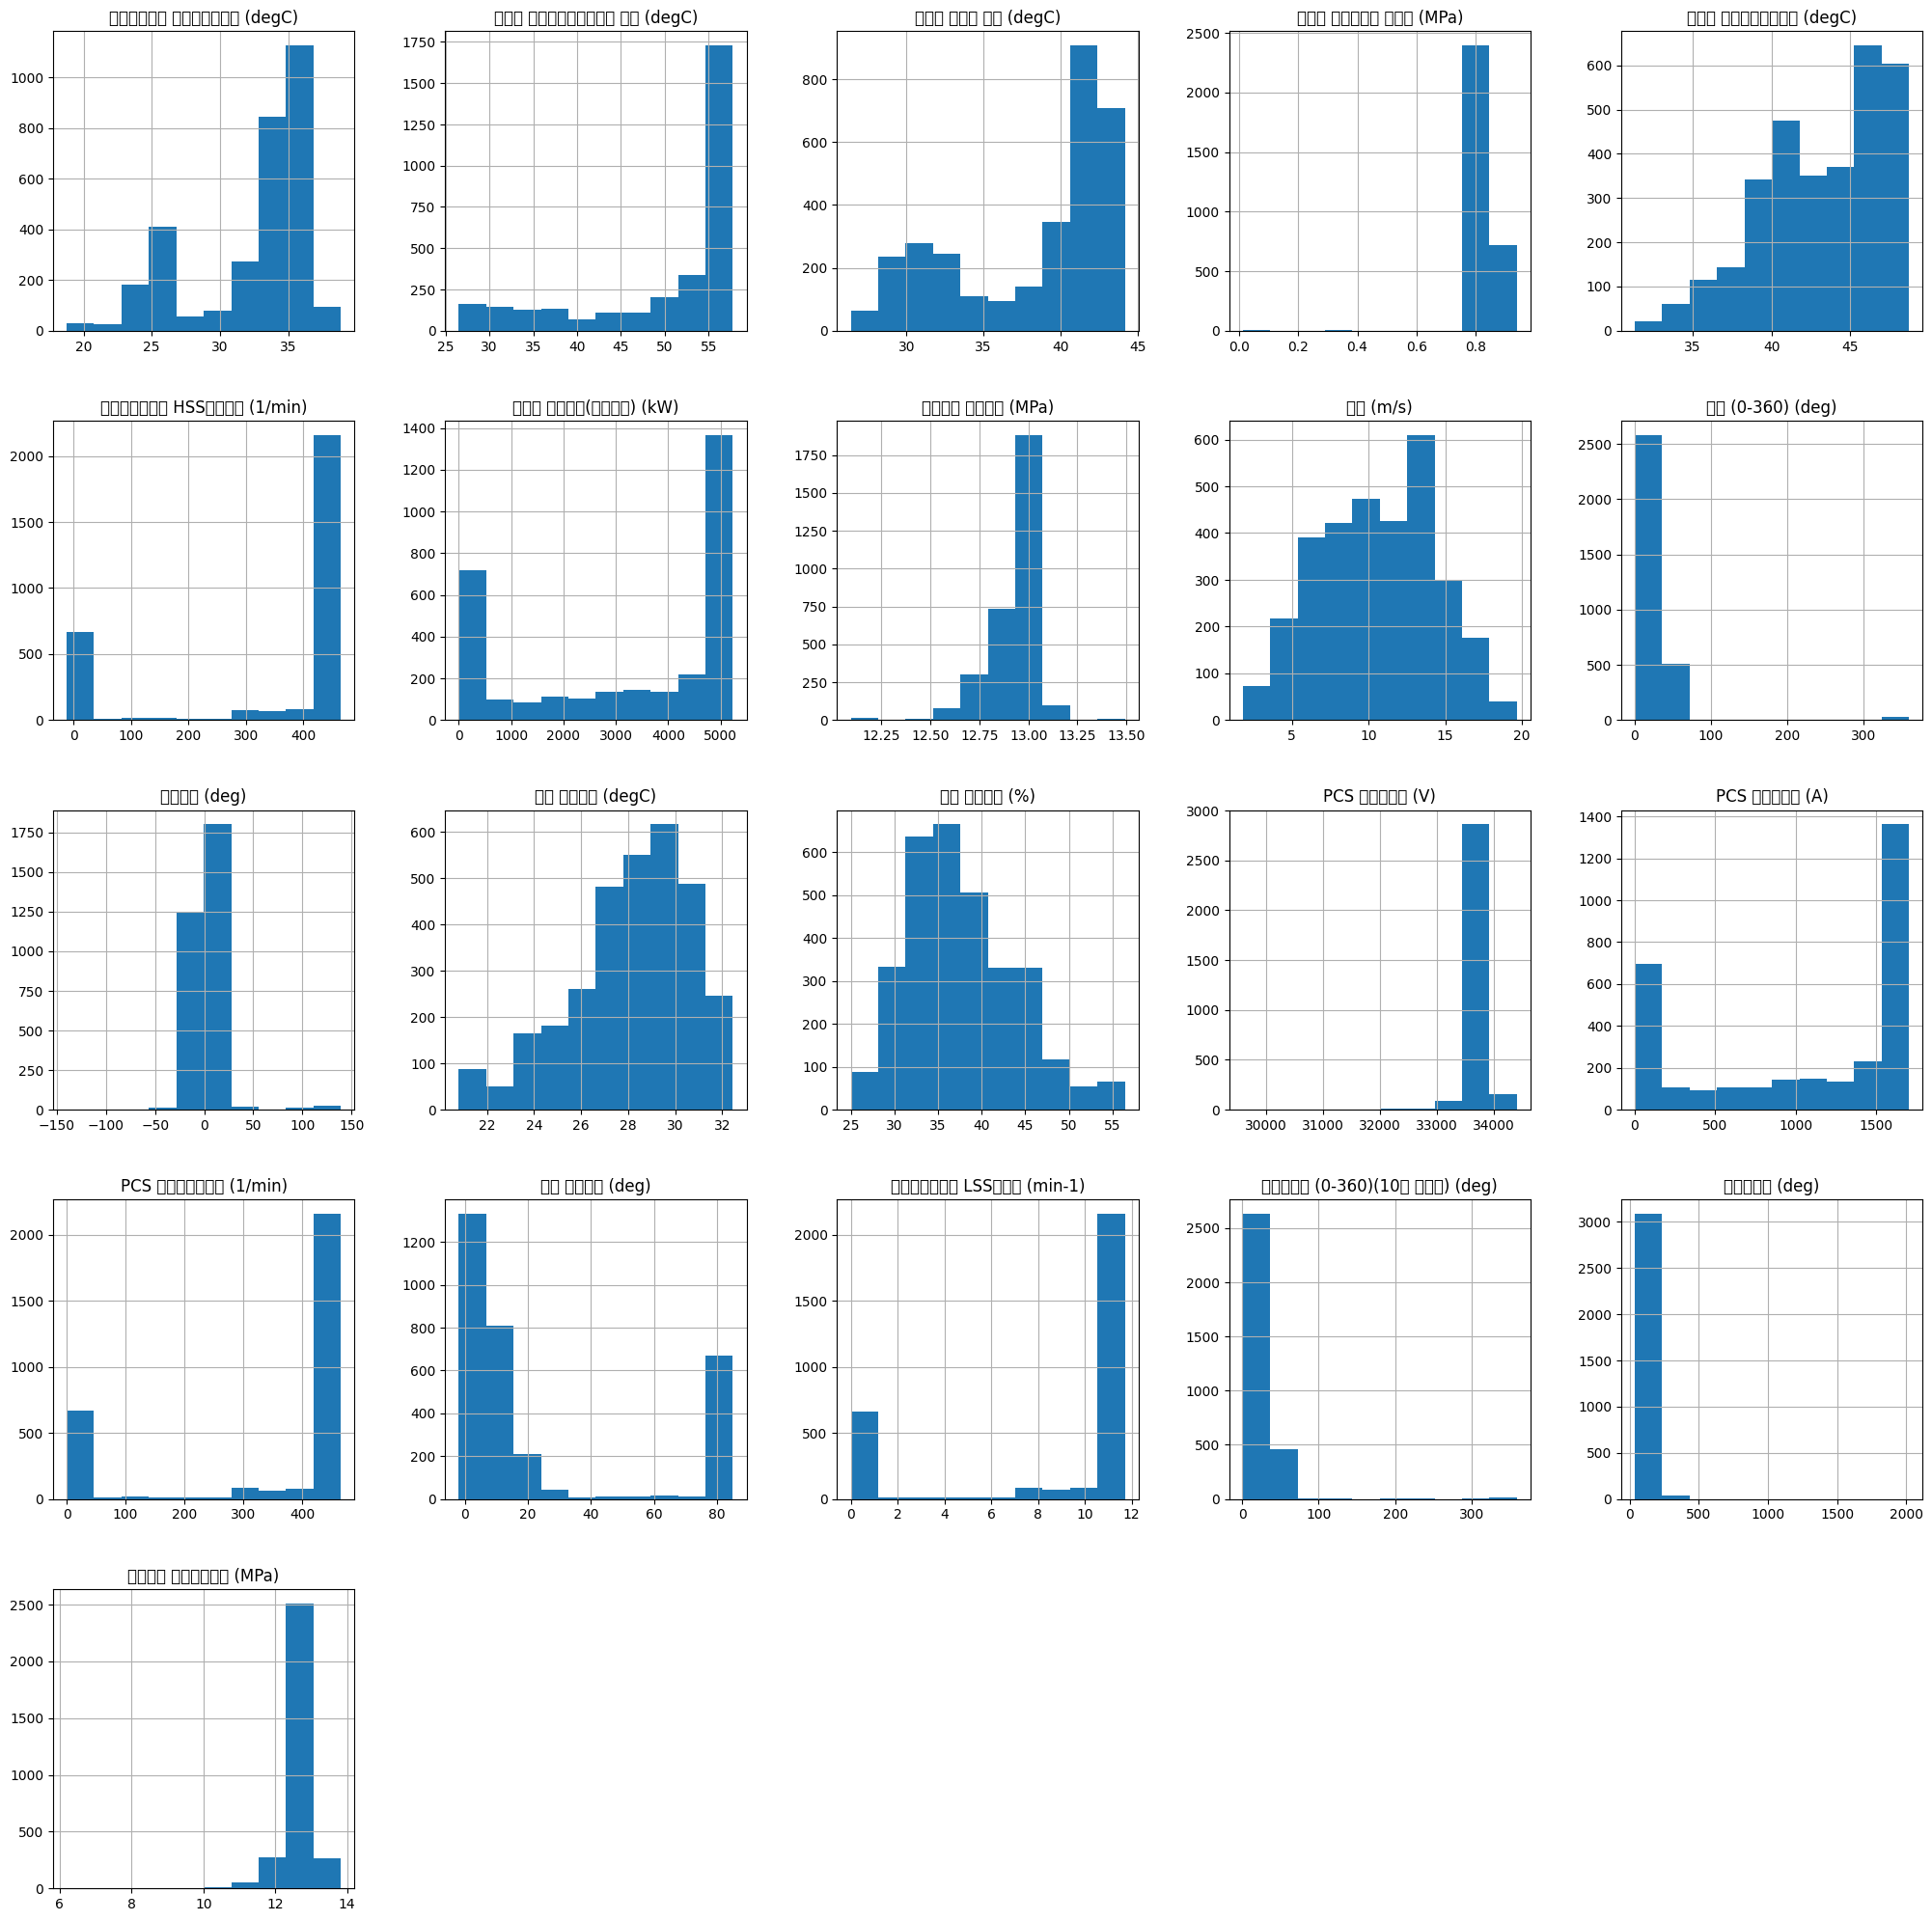

In [9]:
# Visualize the distribution of numeric features
train.hist(figsize=(25, 25))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 27231 (\N{CJK UNIFIED IDEOGRAPH-6A5F}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 33369 (\N{CJK UNIFIED IDEOGRAPH-8259}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 27700 (\N{CJK UNIFIED IDEOGRAPH-6C34}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20919 (\N{CJK UNIFIED IDEOGRAPH-51B7}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 21934 (\N{CJK UNIFIED IDEOGRAPH-55AE}) missing from current font.
  fig.canvas.draw()
/opt/conda/lib/python3.10/site-packages/seaborn/utils.py:80: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from current font.
  fig.canvas.draw()
/opt

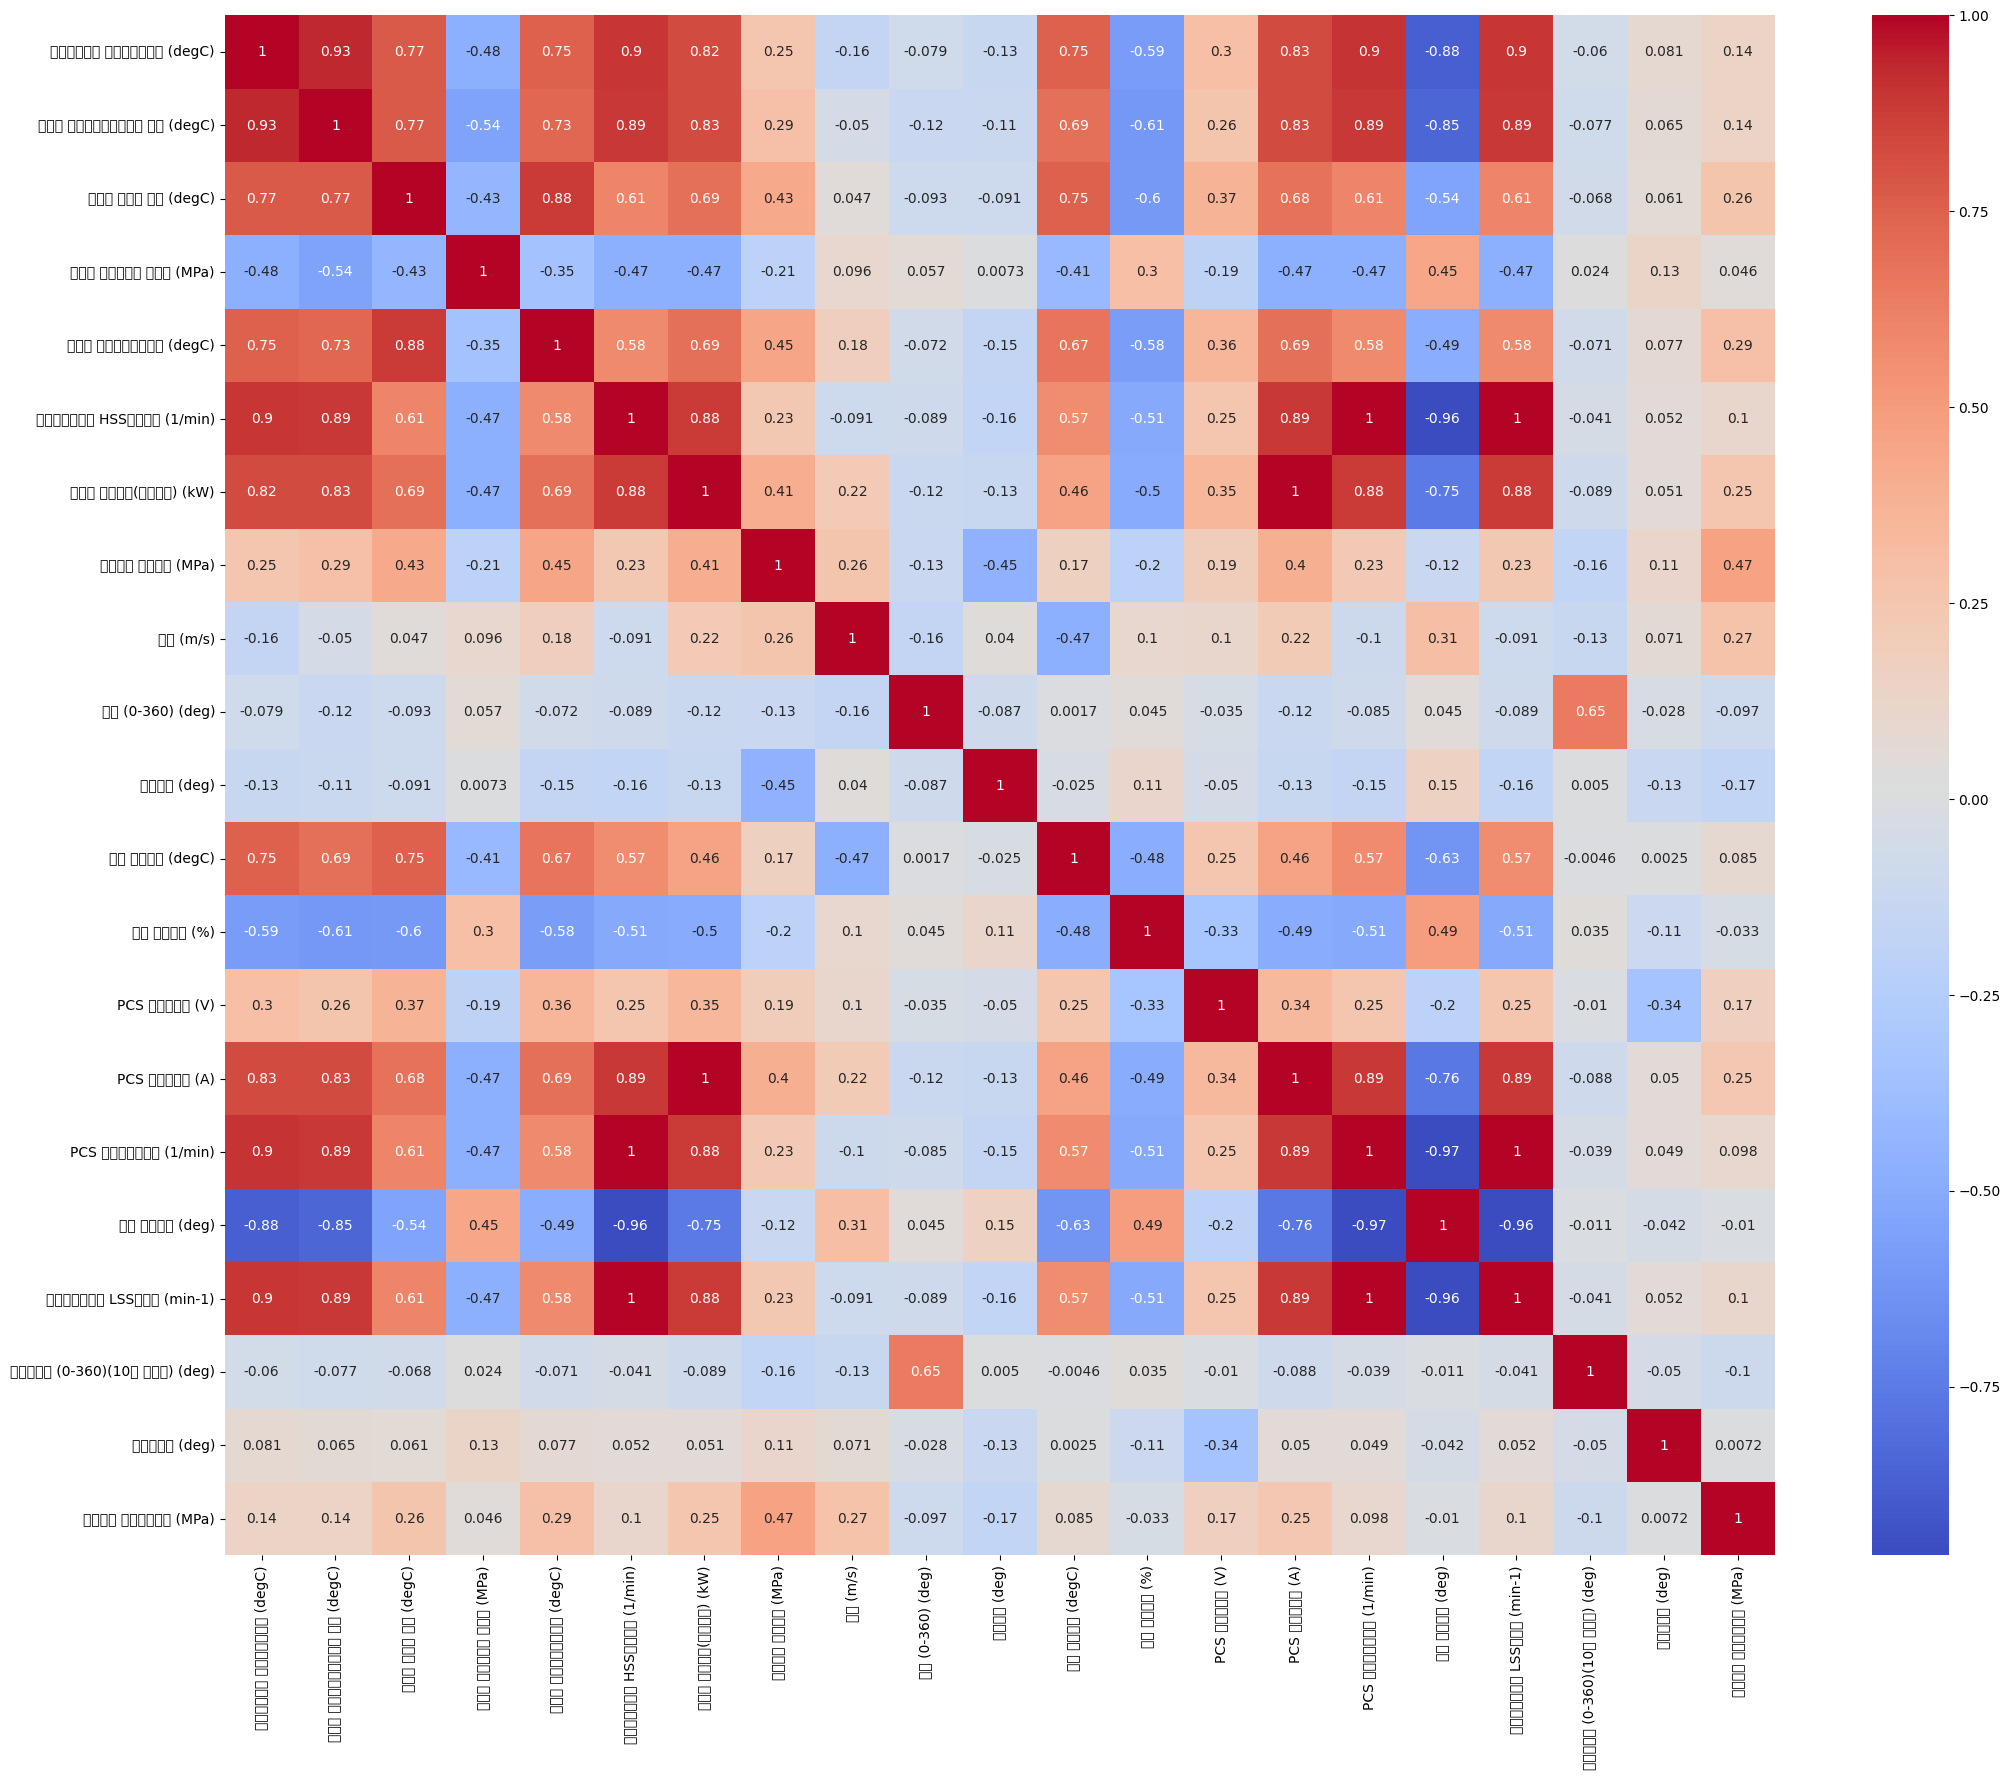

In [10]:
# Visualize correlations between numeric features
plt.figure(figsize=(25, 20))
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [11]:
# # Visualize relationships between variables
# plt.figure(figsize=(25, 20))
# sns.pairplot(train)
# plt.show()


In [12]:
numerical_cols_test = test.columns
numerical_cols_test

Index(['機艙水冷單元 冷卻器入口水溫 (degC)', '齒輪箱 發電機側輸出軸軸承 溫度 (degC)', '齒輪箱 潤滑油 溫度 (degC)',
       '齒輪箱 油循環單元 泵液壓 (MPa)', '發電機 軸承反驅動側溫度 (degC)', '發電機旋轉速度 HSS編碼器值 (1/min)',
       '液壓單元 系統壓力 (MPa)', '風速 (m/s)', '風向 (0-360) (deg)', '轉向誤差 (deg)',
       '機艙 内部溫度 (degC)', '機艙 内部濕度 (%)', 'PCS 受電點電壓 (V)', 'PCS 受電點電流 (A)',
       'PCS 發電機旋轉速度 (1/min)', '旋翼 平均角度 (deg)', '低速軸旋轉速度 LSS編碼器 (min-1)',
       '機艙方位角 (0-360)(10分 瞬時値) (deg)', '轉向編碼器 (deg)', '液壓單元 轉向煞車鉗壓 (MPa)'],
      dtype='object')

In [13]:
X = train.drop('高壓盤 有效功率(風機輸出) (kW)', axis=1)
y = train['高壓盤 有效功率(風機輸出) (kW)']

In [14]:
numerical_cols_train = X.columns
numerical_cols_train

Index(['機艙水冷單元 冷卻器入口水溫 (degC)', '齒輪箱 發電機側輸出軸軸承 溫度 (degC)', '齒輪箱 潤滑油 溫度 (degC)',
       '齒輪箱 油循環單元 泵液壓 (MPa)', '發電機 軸承反驅動側溫度 (degC)', '發電機旋轉速度 HSS編碼器值 (1/min)',
       '液壓單元 系統壓力 (MPa)', '風速 (m/s)', '風向 (0-360) (deg)', '轉向誤差 (deg)',
       '機艙 内部溫度 (degC)', '機艙 内部濕度 (%)', 'PCS 受電點電壓 (V)', 'PCS 受電點電流 (A)',
       'PCS 發電機旋轉速度 (1/min)', '旋翼 平均角度 (deg)', '低速軸旋轉速度 LSS編碼器 (min-1)',
       '機艙方位角 (0-360)(10分 瞬時値) (deg)', '轉向編碼器 (deg)', '液壓單元 轉向煞車鉗壓 (MPa)'],
      dtype='object')

In [15]:
from sklearn.preprocessing import PowerTransformer, StandardScaler

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [16]:
scaler = StandardScaler()
power_transformer = PowerTransformer(method='yeo-johnson')

In [17]:
pipeline = Pipeline([
    ('scaler', scaler),
    ('power_transformer', power_transformer)
])

In [18]:
preprocessor_train = ColumnTransformer(
    transformers=[
        ('num', pipeline, numerical_cols_train)
    ])

In [19]:
preprocessor_test = ColumnTransformer(
    transformers=[
        ('num', pipeline, numerical_cols_test)
    ])

In [20]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import catboost as cb
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge

In [21]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

In [22]:
# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=32)

In [23]:
# Initialize base models
xgb_model = xgb.XGBRegressor()
lgb_model = lgb.LGBMRegressor()
ada_model = AdaBoostRegressor()
catboost_model = CatBoostRegressor(verbose=0)

# Train base models
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)
ada_model.fit(X_train, y_train)
catboost_model.fit(X_train, y_train)

# Generate predictions from base models on validation set
xgb_pred_val = xgb_model.predict(X_val)
lgb_pred_val = lgb_model.predict(X_val)
ada_pred_val = ada_model.predict(X_val)
catboost_pred_val = catboost_model.predict(X_val)

# Create a meta-feature matrix from base model predictions
meta_X_val = np.column_stack((xgb_pred_val, lgb_pred_val, ada_pred_val, catboost_pred_val))

# Train the meta-model (Ridge Regression)
ridge = Ridge()
ridge.fit(meta_X_val, y_val)

# Make predictions on the validation set with the meta-model
meta_val_pred = ridge.predict(meta_X_val)

# Calculate RMSE for validation set
rmse_val = np.sqrt(mean_squared_error(y_val, meta_val_pred))
print(f"RMSE on validation set: {rmse_val}")

# Testing on the test set
xgb_pred_test = xgb_model.predict(X_test)
lgb_pred_test = lgb_model.predict(X_test)
ada_pred_test = ada_model.predict(X_test)
catboost_pred_test = catboost_model.predict(X_test)

# Create a meta-feature matrix for test predictions
meta_X_test = np.column_stack((xgb_pred_test, lgb_pred_test, ada_pred_test, catboost_pred_test))

# Make predictions on test set with meta-model
meta_test_pred = ridge.predict(meta_X_test)

# Calculate RMSE for test set
rmse_test = np.sqrt(mean_squared_error(y_test, meta_test_pred))
print(f"RMSE on test set: {rmse_test}")

RMSE on validation set: 21.997739854590737
RMSE on test set: 28.820502138806816


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from xgboost import XGBRegressor
from sklearn.linear_model import Ridge

# Define Ridge Regression parameters for Grid Search
ridge_params = {'alpha': [1, 10, 100]}

# Perform Grid Search for Ridge Regression
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(meta_X_val, y_val)

# Print the best parameters and best score for Ridge Regression
print("Best Parameters for Ridge Regression:", ridge_grid.best_params_)
print("Best RMSE Score for Ridge Regression:", np.sqrt(-ridge_grid.best_score_))

# Define XGBoost parameters for Grid Search
xgb_params = {
    'n_estimators': [1000, 3000],
    'max_depth': [1, 2, 3],
    'learning_rate': [0.01, 0.03, 0.06]
}

# Perform Grid Search for XGBoost
xgb_grid = GridSearchCV(XGBRegressor(), xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_grid.fit(meta_X_val, y_val)

# Print the best parameters and best score for XGBoost
print("Best Parameters for XGBoost:", xgb_grid.best_params_)
print("Best RMSE Score for XGBoost:", np.sqrt(-xgb_grid.best_score_))

Best Parameters for Ridge Regression: {'alpha': 100}
Best RMSE Score for Ridge Regression: 24.162501448943576
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 1000}
Best RMSE Score for XGBoost: 41.3529089668437


In [25]:
sample = pd.read_csv('/kaggle/input/wind-power-prediction-contest-202312/sample_submission.csv')
sample

,id,Power
0,1,13.170055
1,2,12.450916
2,3,11.665322
3,4,12.942878
4,5,12.542494
...,...,...
1334,1335,12.956039
1335,1336,13.043203
1336,1337,12.737122
1337,1338,12.441905


In [26]:
# XGBoost model
best_xgb_params = {
    'n_estimators': 900,
    'max_depth': 3,
    'learning_rate': 0.03
}
best_xgb_model = xgb.XGBRegressor(**best_xgb_params)
best_xgb_model.fit(X_train, y_train)
xgb_pred_test = best_xgb_model.predict(test)

# LightGBM model
best_lgbm_params = {
    'n_estimators': 900,
    'max_depth': 5,
    'learning_rate': 0.03
}
best_lgbm_model = lgb.LGBMRegressor(**best_lgbm_params)
best_lgbm_model.fit(X_train, y_train)
lgbm_pred_test = best_lgbm_model.predict(test)

# Taking the mean of predictions from different models
ensemble_pred_test = (xgb_pred_test + lgbm_pred_test) / 2

# Create a DataFrame with predictions
submission = pd.DataFrame({
    'id': sample['id'],  # Replace 'id' with your ID column name in the test data
    'Power': ensemble_pred_test
})

assert submission.shape[0] == 1339, "Submission length is incorrect."

submission.to_csv('predictions.csv', index=False)
